In [18]:
# Import Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

# Regressor Libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Other Libraries
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor

# Explore Dataframe

In [19]:
# Pull Housing Price data
path = '/Users/mac/Dropbox/Thinkful_Coursework/Course/Unit_3/Lesson 6/Housing Prices/Melbourne_full.csv'
df = pd.read_csv(path)

In [20]:
# Number of rows and columns
x = 93
print('Shape of dataframe')
print('-' *x)
print('No. of Rows:', df.shape[0])
print('No. of Columns:', df.shape[1])
print('-' *x)

# Check data types
print('Column Data Types')
print('-' *x)
print(df.dtypes)
print('-' *x)

# Check for missing data
print('Missing Data in Dataframe')
print('-' *x)
print(df.isnull().sum().sort_values(ascending=False))
print('-' *x)

# Check for outliers
print('Column Summary')
print('-' *x)
df.describe().transpose()

Shape of dataframe
---------------------------------------------------------------------------------------------
No. of Rows: 34857
No. of Columns: 21
---------------------------------------------------------------------------------------------
Column Data Types
---------------------------------------------------------------------------------------------
Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object
---------------------------------------------------------------------------------------------
Missing Da

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [21]:
# Convert object columns to categorical variables
object_cols = df.select_dtypes(['object']).columns.tolist()

for cols in object_cols:
    df[cols] = df[cols].astype('category') 
    
# Convert date column to date object. Add Month and Year columns for Analysis
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
print('-' *(x))
print('Updated No. of Columns:', df.shape[1])    

# Convert Postcode columns to categorical variable
numeric_cols = ['Postcode']  

for cols in numeric_cols:
    df[cols] = df[cols].astype('category')   

# Print Update Data Types   
print('-' *(x))
print('Updated Data Types')
print('-' *x)
print(df.dtypes)

---------------------------------------------------------------------------------------------
Updated No. of Columns: 23
---------------------------------------------------------------------------------------------
Updated Data Types
---------------------------------------------------------------------------------------------
Suburb                 category
Address                category
Rooms                     int64
Type                   category
Price                   float64
Method                 category
SellerG                category
Date             datetime64[ns]
Distance                float64
Postcode               category
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea            category
Lattitude               float64
Longtitude              float64
Regionname             category
Propertycount           float64


In [22]:
# Remove rows with missing data
df_drop = df.dropna()

# Check to see how many rows were removed
print('-' *x)
print('Removed No. of Rows:', df.shape[0] - df_drop.shape[0])
print('Updated No. of Rows:', df_drop.shape[0]) 
print('-' *x)

# Check to see if null values still exist
print('Missing Data in Dataframe')
print('-' *x)
print(df_drop.isnull().sum().sort_values(ascending=False))
print('-' *x)

---------------------------------------------------------------------------------------------
Removed No. of Rows: 25970
Updated No. of Rows: 8887
---------------------------------------------------------------------------------------------
Missing Data in Dataframe
---------------------------------------------------------------------------------------------
Year             0
Bedroom2         0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Month            0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
Suburb           0
dtype: int64
---------------------------------------------------------------------------------------------


# Feature Engineering - 1st Pass

In [23]:
# Add age variable
df_drop['Age'] = 2018 - df_drop['YearBuilt']

# Identify historic homes
df_drop['Historic'] = np.where(df_drop['Age']>=50,'Historic','Contemporary')

# Convert to Category
df_drop['Historic'] = df_drop['Historic'].astype('category')

# Check for new added Features
print('-' *x)
print('No. of Columns  Added:', df_drop.shape[1] - df.shape[1])
print('No. of Columns  Total:', df_drop.shape[1]) 
print('-' *x)

---------------------------------------------------------------------------------------------
No. of Columns  Added: 2
No. of Columns  Total: 25
---------------------------------------------------------------------------------------------


# Feature Analysis: Outliers

In [24]:
# Find Cols for Outliers
outlier_cols = df_drop.select_dtypes(['float64']).columns.tolist()
print(outlier_cols)

['Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount', 'Age']


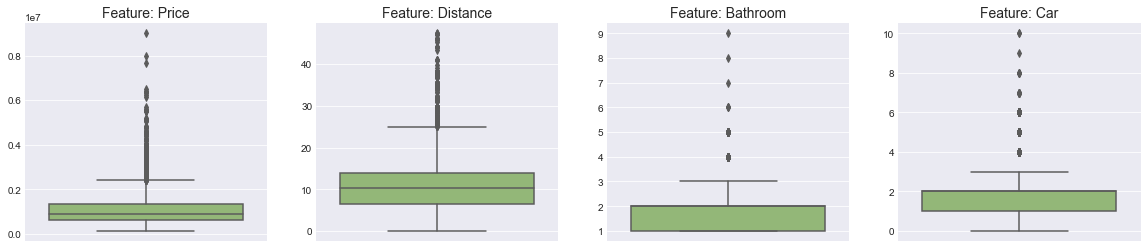

In [25]:
# Checked Features for Outliers
colors = ["#91c16e"]

f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Review Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(y="Price", data=df_drop, palette=colors, ax=axes[0])
axes[0].set_title('Feature: Price', fontsize=14)
axes[0].set_ylabel('', fontsize=14)

sns.boxplot(y="Distance", data=df_drop, palette=colors, ax=axes[1])
axes[1].set_title('Feature: Distance', fontsize=14)
axes[1].set_ylabel('', fontsize=14)

sns.boxplot(y="Bathroom", data=df_drop, palette=colors, ax=axes[2])
axes[2].set_title('Feature: Bathroom', fontsize=14)
axes[2].set_ylabel('', fontsize=14)

sns.boxplot(y="Car", data=df_drop, palette=colors, ax=axes[3])
axes[3].set_title('Feature: Car', fontsize=14)
axes[3].set_ylabel('', fontsize=14)

plt.show()

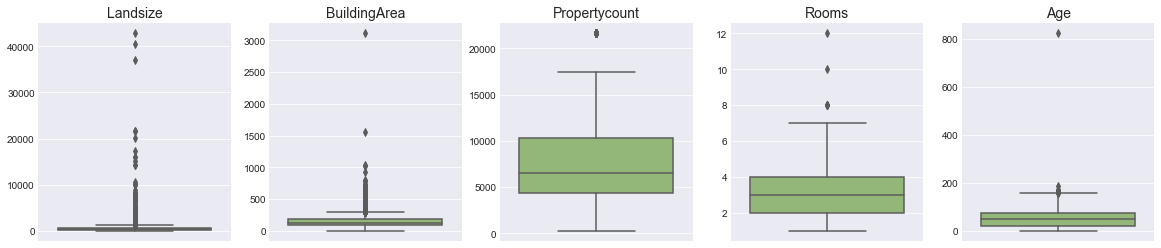

In [26]:
# Checked Features for Outliers
colors = ["#91c16e"]

f, axes = plt.subplots(ncols=5, figsize=(20,4))

# Review Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(y="Landsize", data=df_drop, palette=colors, ax=axes[0])
axes[0].set_title('Landsize', fontsize=14)
axes[0].set_ylabel('', fontsize=14)

sns.boxplot(y="BuildingArea", data=df_drop, palette=colors, ax=axes[1])
axes[1].set_title('BuildingArea', fontsize=14)
axes[1].set_ylabel('', fontsize=14)

sns.boxplot(y="Propertycount", data=df_drop, palette=colors, ax=axes[2])
axes[2].set_title('Propertycount', fontsize=14)
axes[2].set_ylabel('', fontsize=14)

sns.boxplot(y="Rooms", data=df_drop, palette=colors, ax=axes[3])
axes[3].set_title('Rooms', fontsize=14)
axes[3].set_ylabel('', fontsize=14)

sns.boxplot(y="Age", data=df_drop, palette=colors, ax=axes[4])
axes[4].set_title('Age', fontsize=14)
axes[4].set_ylabel('', fontsize=14)

plt.show()

# Feature Analysis: Outcome Variable

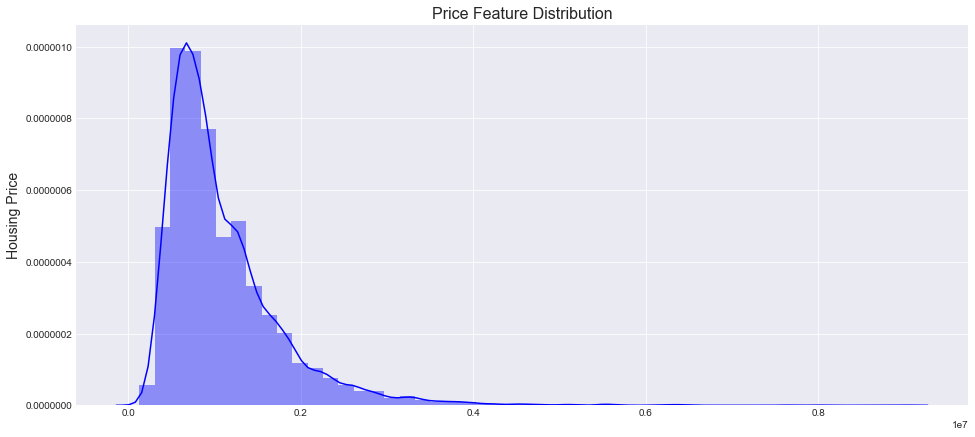

In [27]:
#Plot Price Feature Distribution
plt.figure(figsize=(16,7))

sns.distplot(df_drop['Price'], color='b')
plt.title('Price Feature Distribution', fontsize=16)
plt.xlabel('')
plt.ylabel('Housing Price', fontsize=14)

plt.show()

In [28]:
# Abbreviate Regionname categories
df_drop['Regionname'] = df_drop['Regionname'].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro', 
                                            'Southern Metropolitan':'S Metro', 
                                            'Eastern Metropolitan':'E Metro', 
                                            'South-Eastern Metropolitan':'SE Metro', 
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'})

# Feature Analysis: Categorical Features vs. Price

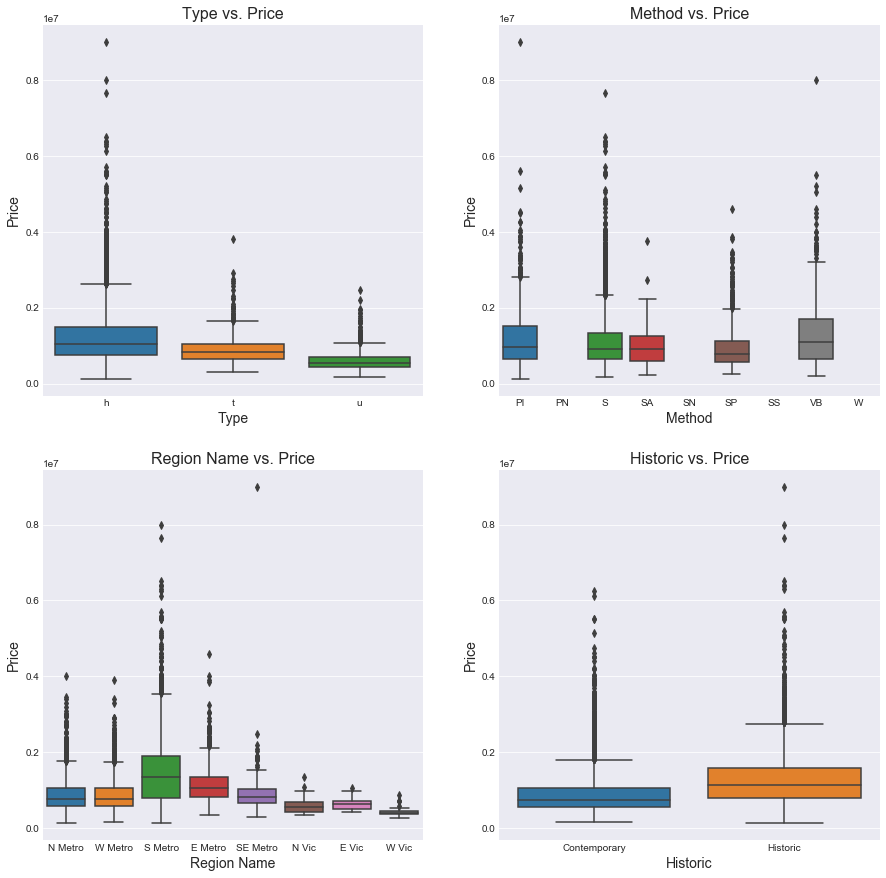

In [29]:
# Suplots of Categorical Features vs Price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot Type vs. Price
sns.boxplot(data = df_drop, x = 'Type', y = 'Price', ax = axes[0,0])
axes[0,0].set_xlabel('Type', fontsize=14)
axes[0,0].set_ylabel('Price', fontsize=14)
axes[0,0].set_title('Type vs. Price', fontsize=16)

# Plot Method vs. Price
sns.boxplot(x = 'Method', y = 'Price', data = df_drop, ax = axes[0,1])
axes[0,1].set_xlabel('Method',fontsize=14)
axes[0,1].set_ylabel('Price',fontsize=14)
axes[0,1].set_title('Method vs. Price',fontsize=16)

# Plot Region Name vs. Price
sns.boxplot(x = 'Regionname', y = 'Price', data = df_drop, ax = axes[1,0])
axes[1,0].set_xlabel('Region Name',fontsize=14)
axes[1,0].set_ylabel('Price',fontsize=14)
axes[1,0].set_title('Region Name vs. Price',fontsize=16)

# Plot Historic vs. Price
sns.boxplot(x = 'Historic', y = 'Price', data = df_drop, ax = axes[1,1])
axes[1,1].set_xlabel('Historic', fontsize=14)
axes[1,1].set_ylabel('Price',fontsize=14)
axes[1,1].set_title('Historic vs. Price', fontsize=16)

plt.show()

# Feature Engineering - 2nd Pass

In [30]:
#Encode Regionname Feature
df_drop['Regionname_num'] = pd.Categorical(df_drop.Regionname).codes

#Map Regionname with weights and add new feature
def regionmapper(r):
    if r == 'W Vic':
        return 1
    elif r == 'N Vic':
        return 2
    elif r == 'E Vic':
        return 3
    elif r == 'SE Metro':
        return 4
    elif r == 'W Metro':
        return 5
    elif r == 'N Metro':
        return 6
    elif r == 'E Metro':
        return 7
    else:
        return 8

#Add Regionname_num2 Feature    
df_drop['Regionname_num2'] = df_drop.Regionname.apply(lambda x: regionmapper(x))

#Add Avg Price by Regionname Name Feature
df_temp = df_drop.groupby('Regionname').Price.mean().reset_index()
df_temp['Avg_Price'] = df_temp.Price/100000

#Merge dataframes
df_drop = pd.merge(df_drop, df_temp[['Regionname','Avg_Price']], on=['Regionname'])

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'


# Feature Analysis: Numerical Features vs. Price

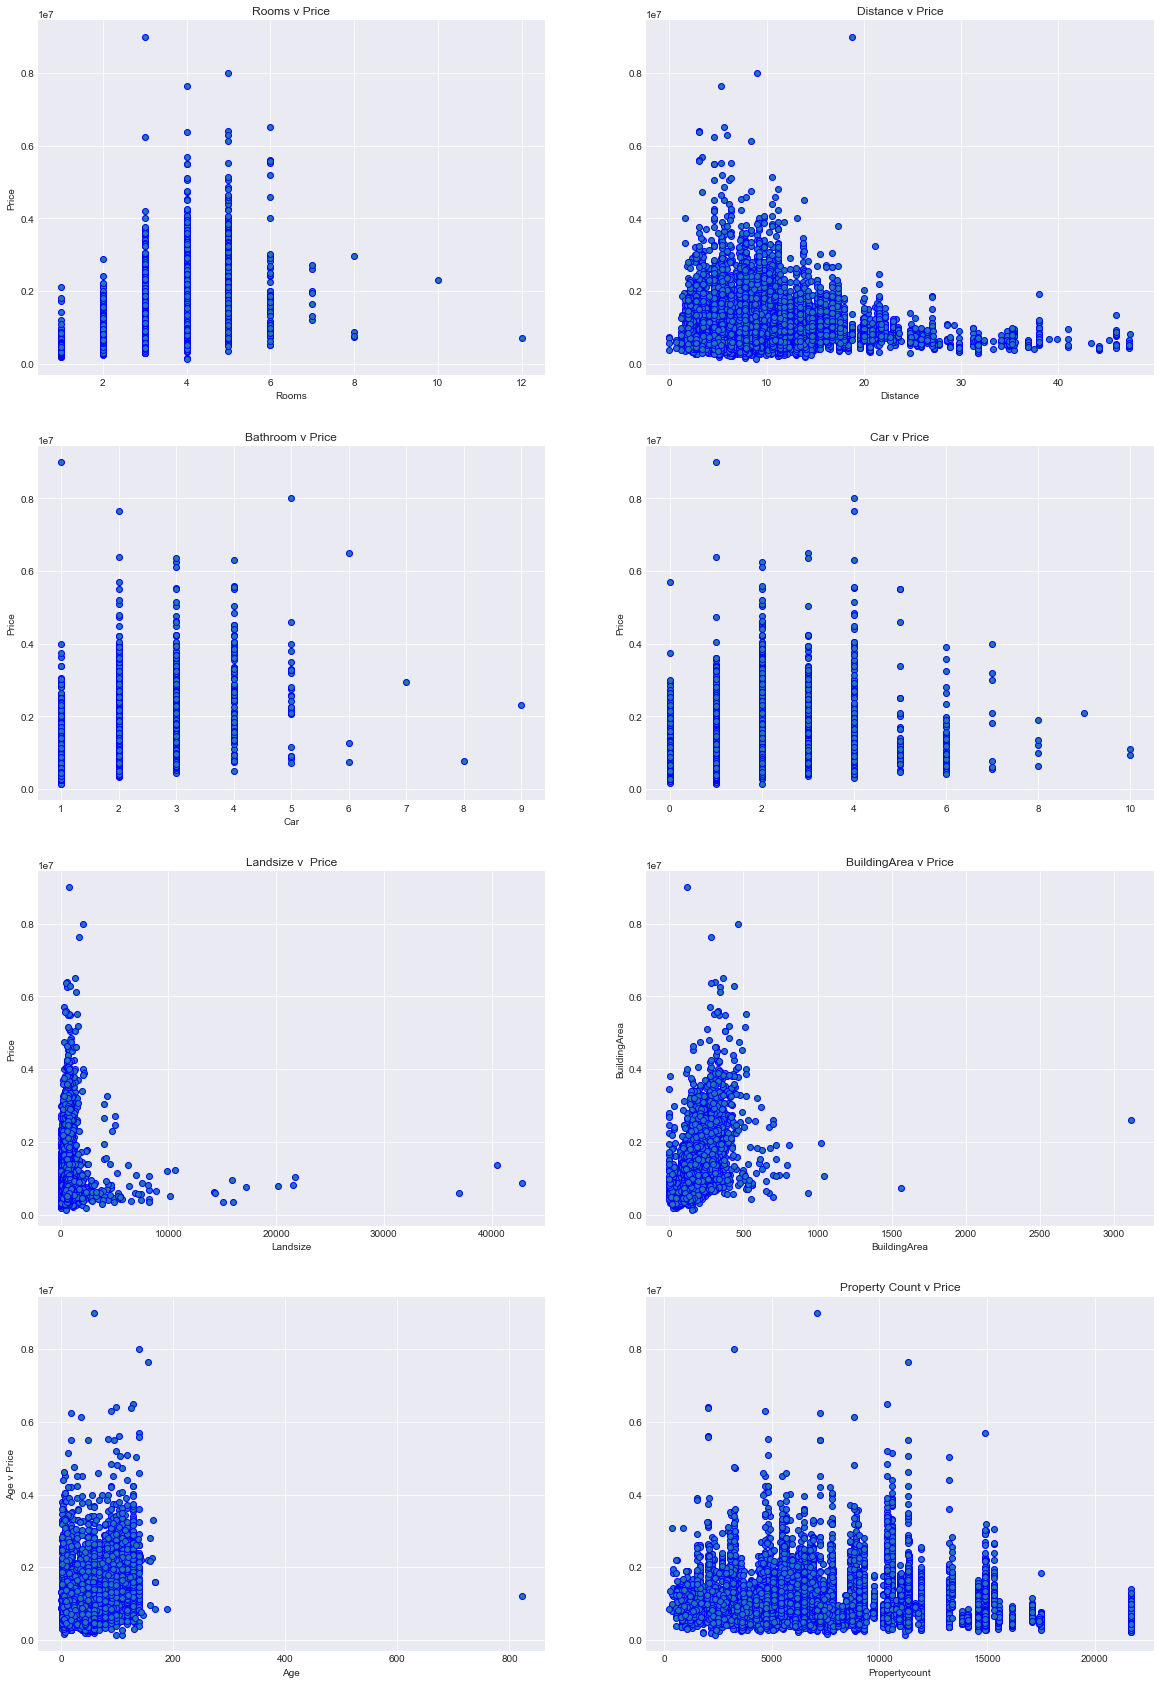

In [31]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = df_drop, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = df_drop, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = df_drop, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = df_drop, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = df_drop, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = df_drop, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')

# Plot [3,0]
axes[3,0].scatter(x = 'Age', y = 'Price', data = df_drop, edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('Age v Price')

# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = df_drop, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
#axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count v Price')

plt.show()

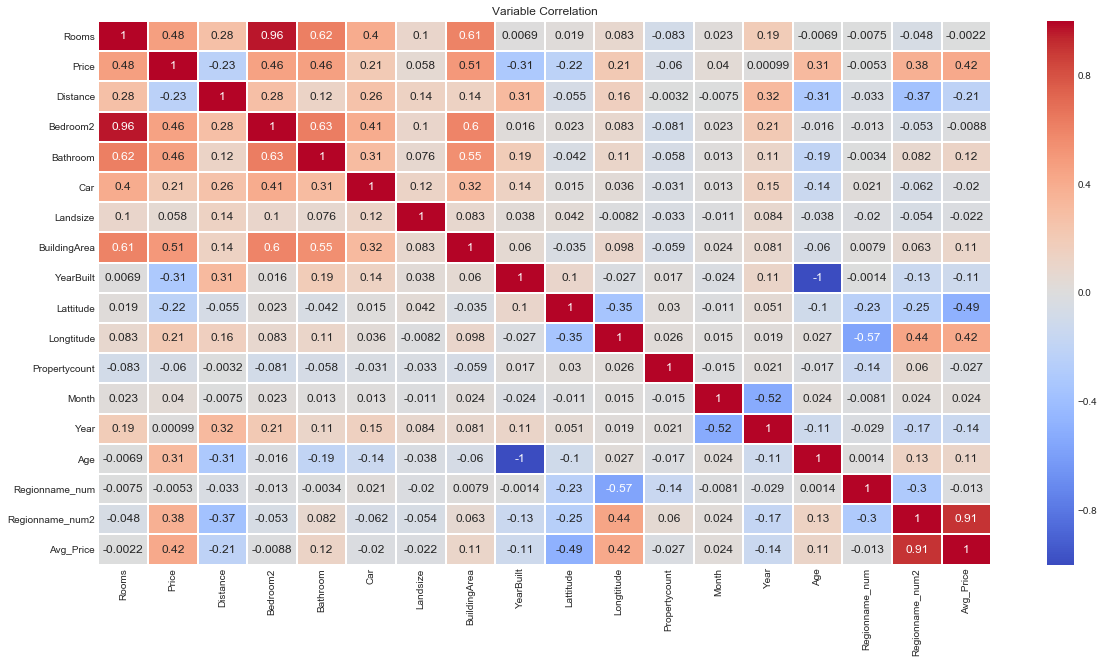

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(df_drop.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 12})

plt.title('Variable Correlation')
plt.show()

In [33]:
# Create features variable 
X =df_drop[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'Propertycount','Age','Regionname_num2','Avg_Price']]

# Create target variable
y = df_drop['Price']

# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [34]:
#Define Regression Models
lr = LinearRegression()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
dt = DecisionTreeRegressor()
br = BaggingRegressor()
knn = KNeighborsRegressor()

#Fit Regression Models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
dt.fit(X_train, y_train)
br.fit(X_train, y_train)
knn.fit(X_train, y_train)

#Determine Regression Scores
print('Linear Regression Model Accuarcy is', round(lr.score(X_test, y_test) * 100,2),'%')
print('Random Forest Regressor Accuarcy is', round(rf.score(X_test, y_test) * 100,2),'%')
print('Gradient Boosting Regressor Accuarcy is', round(gb.score(X_test, y_test) * 100,2),'%')
print('Decision Tree Regressor Accuarcy is', round(dt.score(X_test, y_test) * 100,2),'%')
print('Bagging Regressor Accuarcy is', round(br.score(X_test, y_test) * 100,2),'%')
print('KNeighbors Regressor Accuarcy is', round(br.score(X_test, y_test) * 100,2),'%')

Linear Regression Model Accuarcy is 60.02 %
Random Forest Regressor Accuarcy is 78.63 %
Gradient Boosting Regressor Accuarcy is 78.87 %
Decision Tree Regressor Accuarcy is 59.63 %
Bagging Regressor Accuarcy is 77.36 %
KNeighbors Regressor Accuarcy is 77.36 %


# Conclusion

Of the 6 Regression models used, the Bagging and KNeighbors seemed to perform the best at 79% accuarcy.  The initial dataset contained a great deal of missing data.  To deal with this, over 25,000 rows of data were removed.  This may have prevented the model from explaining a higher percentage of the variation in dataset. The model accuracy could be improved by imputting some of the missing data.  Also, the model could be improved by creating a price bin for the outcome variable and running classifer models.    